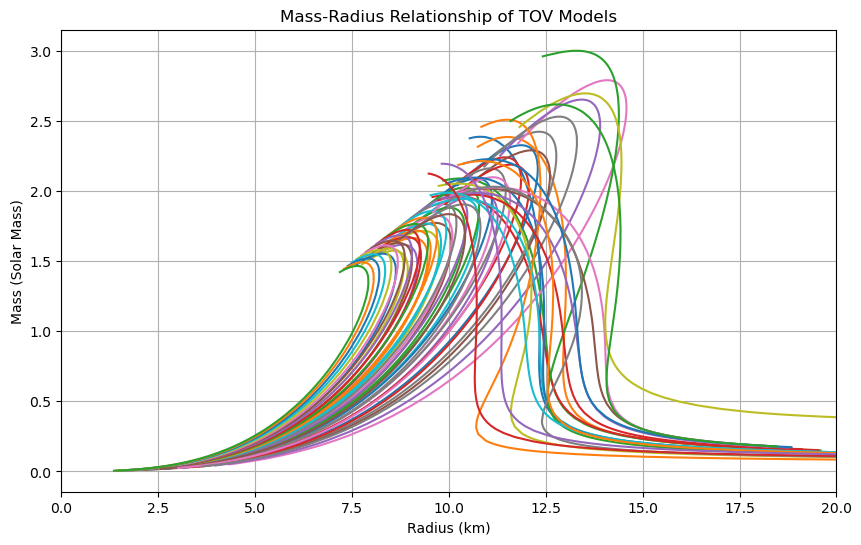

In [3]:
import os
import csv
import matplotlib.pyplot as plt

def read_csv_data(filename):
    masses = []
    radii = []
    with open(filename, "r") as f:
        reader = csv.reader(f)
        next(reader)  # Skip header
        for row in reader:
            try:
                mass, radius = float(row[0]), float(row[1])
                masses.append(mass)
                radii.append(radius)
            except ValueError:
                continue  # Skip invalid rows
    return masses, radii

def plot_mass_radius():
    plt.figure(figsize=(10, 6))

    for filename in os.listdir():
        if filename.startswith("TOV_results_") and filename.endswith(".csv"):
            model_name = filename.replace("TOV_results_", "").replace(".csv", "")
            masses, radii = read_csv_data(filename)
            if masses and radii:
                plt.plot(radii, masses, label=model_name, linestyle="-")
                plt.xlim(0,20)

    plt.xlabel("Radius (km)")
    plt.ylabel("Mass (Solar Mass)")
    plt.title("Mass-Radius Relationship of TOV Models")
    # plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    plot_mass_radius()


In [1]:
import pandas as pd
import numpy as np
import glob

# Define the file path pattern
file_pattern ="TOV_results_*.csv"
# Get all matching files
files = glob.glob(file_pattern)
samples = 45
# Dictionary to store results
sampled_data = []

for file in files:
    df = pd.read_csv(file)
    sampled_data.append(df.sample(samples))
        